In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
laliga = pd.read_csv("laliga21-22players.csv")

In [3]:
laliga['total_passes']

0         0
1      2054
2       585
3         5
4         0
       ... 
486     129
487    1226
488    1815
489    1803
490    1439
Name: total_passes, Length: 491, dtype: int64

In [4]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   name                       491 non-null    object
 1   nickname                   491 non-null    object
 2   country                    491 non-null    object
 3   team                       491 non-null    object
 4   position                   491 non-null    object
 5   age                        491 non-null    int64 
 6   games_played               491 non-null    int64 
 7   time_played                491 non-null    int64 
 8   goals                      491 non-null    int64 
 9   goal_assists               491 non-null    int64 
 10  headed_goals               491 non-null    int64 
 11  left_foot_goals            491 non-null    int64 
 12  right_foot_goals           491 non-null    int64 
 13  penalties_taken            491 non-null    int64 
 14  penalty_go

In [165]:
laliga.describe()

,age,games_played,time_played,goals,goal_assists,headed_goals,left_foot_goals,right_foot_goals,penalties_taken,penalty_goals,...,Total_successful_passes,total_unsuccessful_passes,unsuccessful_dribbles,successful_dribbles,clean_sheets,total_shots,tackles_lost,tackles_won,yellow_cards,total_red_cards
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,...,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,26.217923,17.285132,1115.523422,1.505092,1.085540,0.252546,0.470468,0.771894,0.217923,0.154786,...,1187.745418,210.961303,7.849287,10.264766,2.541752,10.221996,7.340122,10.201629,2.784114,0.122200
std,4.927988,12.881095,992.712697,2.982513,1.868322,0.661915,1.205702,1.932774,0.903149,0.682487,...,1305.999146,212.773686,12.267665,14.525529,3.619644,13.914667,8.713138,11.740305,2.949616,0.374351
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,3.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,88.500000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,18.000000,1014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,803.000000,165.000000,3.000000,4.000000,1.000000,5.000000,4.000000,6.000000,2.000000,0.000000
75%,30.000000,29.000000,1856.500000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1815.000000,333.000000,11.000000,15.000000,4.000000,14.000000,11.000000,17.000000,4.500000,0.000000
max,41.000000,38.000000,3420.000000,27.000000,13.000000,5.000000,14.000000,20.000000,11.000000,7.000000,...,7190.000000,1088.000000,114.000000,95.000000,19.000000,99.000000,44.000000,66.000000,15.000000,2.000000


***want to calculate    
unique positions,
total forward players,
no of players,
unique nationality,
clubs with max goals,
clubs with max players,
clubs with least players,
clubs with max goals concede,
clubs average age,
clubs playing with most underage plyers,
player with most goals,
player with most assists,
player with most yellow cards,
plyer with  most redcards,
goalkepper with most clean sheets,
goalkepper with most saves,
goalkepper with having better penalty saves percentage,
player with most dribbles in a season,
defenders with most successful tackles,
goals per match by top 10 players***

In [10]:
np.size(laliga['position'].unique())

4

In [11]:
laliga['position'].unique()

array(['Defender', 'Forward', 'Goalkeeper', 'Midfielder'], dtype=object)

Text(0.5, 1.0, 'no of players in a particular position')

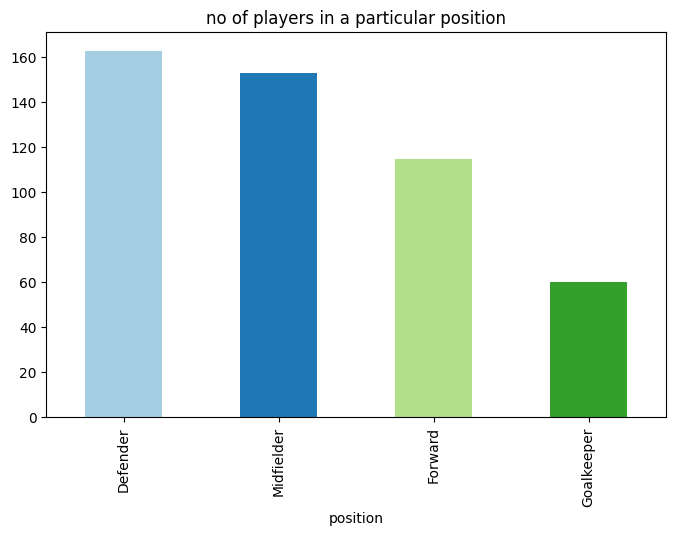

In [12]:
player_position = laliga.groupby('position').size().sort_values(ascending=False)
color = sns.color_palette("Paired")
player_position.plot(kind="bar",figsize = (8,5),color = color)
plt.title("no of players in a particular position")

In [13]:
laliga['country'].unique()

array(['ES', 'FR', 'DK', 'BR', 'CF', 'AR', 'MX', 'SI', 'UY', 'PT', 'MZ',
       'HR', 'ME', 'BE', 'RS', 'AO', 'HN', 'GQ', 'RO', 'MA', 'PY', 'CL',
       'AM', 'NL', 'DE', 'GA', 'US', 'TG', 'TR', 'CZ', 'IE', 'CO', 'SN',
       'VE', 'AL', 'CM', 'MK', 'GE', 'MQ', 'SE', 'CR', 'GH', 'PE', 'CI',
       'UA', 'AT', 'GB-WLS', 'DO', 'NO', 'AU', 'RU', 'GP', 'CH', 'GN',
       'DZ', 'AD', 'EC', 'NG'], dtype=object)

In [14]:
np.size(laliga['country'].unique())

58

<AxesSubplot: title={'center': 'Top 10 countries having most no of players participated in laliga'}, xlabel='country'>

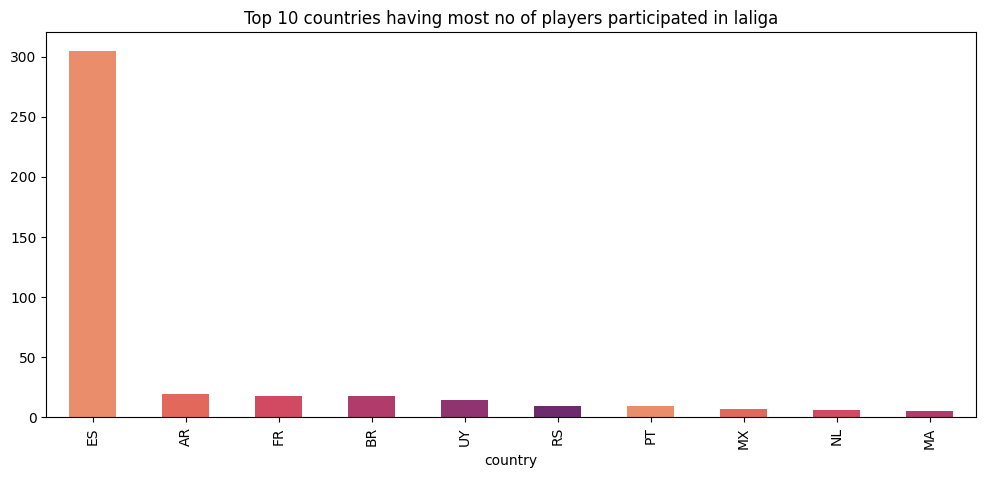

In [15]:
nations = laliga.groupby('country').size().sort_values(ascending=False)
color = sns.color_palette("flare")
plt.title("Top 10 countries having most no of players participated in laliga")
nations.head(10).plot(kind="bar",figsize =(12,5),color = color)

In [16]:
laliga['team'].unique()

array(['Athletic Club', 'AtlÃ©tico de Madrid', 'CA Osasuna', 'CÃ¡diz CF',
       'FC Barcelona', 'Getafe CF', 'Granada CF', 'Levante UD',
       'RC Celta', 'Real Betis', 'Real Madrid', 'Real Sociedad',
       'Sevilla FC', 'Valencia CF', 'Villarreal CF'], dtype=object)

In [17]:
np.size(laliga['team'].unique())

15

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'FC Barcelona'),
  Text(1, 0, 'Levante UD'),
  Text(2, 0, 'Valencia CF'),
  Text(3, 0, 'Sevilla FC'),
  Text(4, 0, 'Real Madrid'),
  Text(5, 0, 'Granada CF'),
  Text(6, 0, 'AtlÃ©tico de Madrid'),
  Text(7, 0, 'RC Celta'),
  Text(8, 0, 'Real Betis'),
  Text(9, 0, 'Villarreal CF'),
  Text(10, 0, 'CÃ¡diz CF'),
  Text(11, 0, 'Athletic Club'),
  Text(12, 0, 'CA Osasuna'),
  Text(13, 0, 'Getafe CF'),
  Text(14, 0, 'Real Sociedad')])

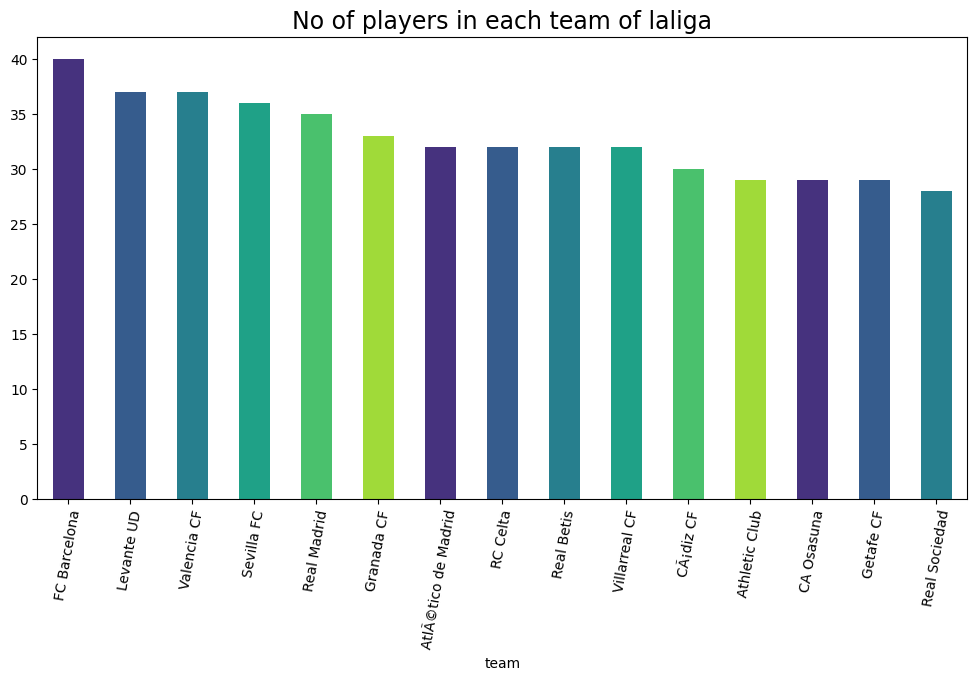

In [57]:
club_players = laliga.groupby('team').size().sort_values(ascending=False)
color = sns.color_palette("viridis")
club_players.plot(kind="bar",figsize=(12,6),color=color)
plt.title("No of players in each team of laliga",fontsize=17)
plt.xticks(rotation=80)

In [19]:
laliga.groupby("team").size().sort_values()

team
Real Sociedad          28
Athletic Club          29
CA Osasuna             29
Getafe CF              29
CÃ¡diz CF              30
AtlÃ©tico de Madrid    32
RC Celta               32
Real Betis             32
Villarreal CF          32
Granada CF             33
Real Madrid            35
Sevilla FC             36
Levante UD             37
Valencia CF            37
FC Barcelona           40
dtype: int64

In [20]:
club_players.max()

40

In [21]:
club_players.min()

28

In [22]:
under20 = laliga[laliga['age'] <= 20]
between20to25 = laliga[(laliga['age'] > 20) & (laliga['age'] <= 25) ]
between25to30 = laliga[(laliga['age'] > 25) & (laliga['age'] <= 30) ] 
above30 = laliga[laliga['age'] > 30]                                           

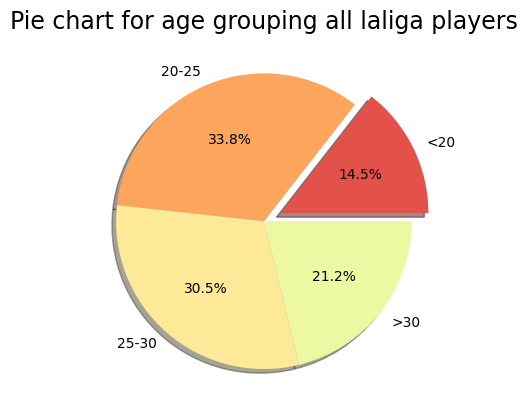

In [34]:
players_age = np.array([under20['nickname'].count(),between20to25['nickname'].count(),between25to30['nickname'].count(),above30['nickname'].count()])
color = sns.color_palette("Spectral")
explode = [0.125,0,0,0]
labels = ["<20","20-25","25-30",">30"]
plt.pie(players_age,labels = labels,explode = explode,colors = color,shadow=True,radius = 1,autopct = "%.1f%%")
plt.title("Pie chart for age grouping all laliga players",fontsize = 17)
plt.show()

<AxesSubplot: >

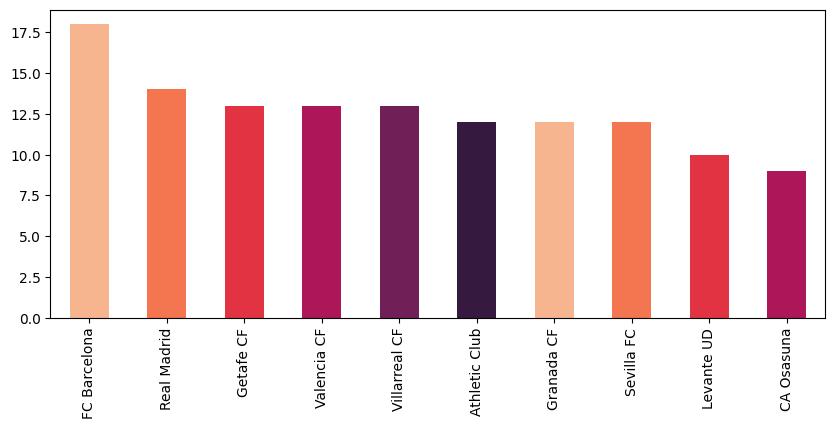

In [24]:
between20to25 = laliga[(laliga['age']>20) & (laliga['age'] <= 25) ]
between20to25['team'].value_counts().head(10).plot(kind="bar",figsize=(10,4),color = sns.color_palette("rocket_r") )

In [36]:
under20 = laliga[laliga['age'] <= 20]
under20['team'].value_counts()

Valencia CF            15
FC Barcelona            8
AtlÃ©tico de Madrid     7
Levante UD              7
RC Celta                6
Sevilla FC              5
Real Madrid             4
Real Sociedad           4
Athletic Club           3
Granada CF              3
Villarreal CF           3
CA Osasuna              2
Getafe CF               2
CÃ¡diz CF               1
Real Betis              1
Name: team, dtype: int64

Text(0.5, 1.0, 'Top 10 clubs with most no of under 20 aged player')

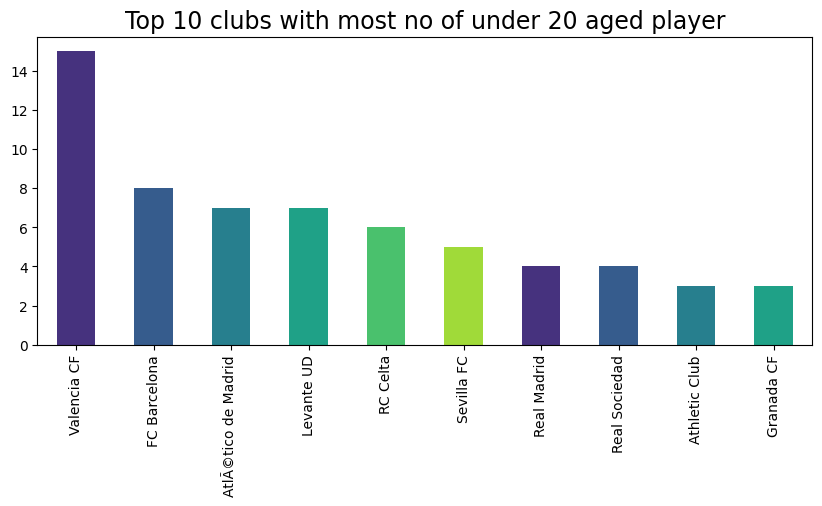

In [62]:
under20['team'].value_counts().head(10).plot(kind="bar",figsize=(10,4),color = sns.color_palette("viridis") )
plt.title('Top 10 clubs with most no of under 20 aged player',fontsize=17)

In [42]:
total_players_eachteam = laliga.groupby('team').size()
average_age = (laliga.groupby('team')['age'].sum())/total_players_eachteam
average_age.sort_values(ascending = True)

team
Valencia CF            23.162162
FC Barcelona           24.950000
Real Sociedad          25.678571
RC Celta               25.812500
AtlÃ©tico de Madrid    26.031250
Real Madrid            26.057143
Getafe CF              26.068966
Sevilla FC             26.166667
Athletic Club          26.172414
Villarreal CF          26.593750
Levante UD             26.729730
Granada CF             26.909091
CA Osasuna             27.275862
Real Betis             28.156250
CÃ¡diz CF              28.366667
dtype: float64

Text(0.5, 1.0, 'Boxplot for age groups of different teams in laliga')

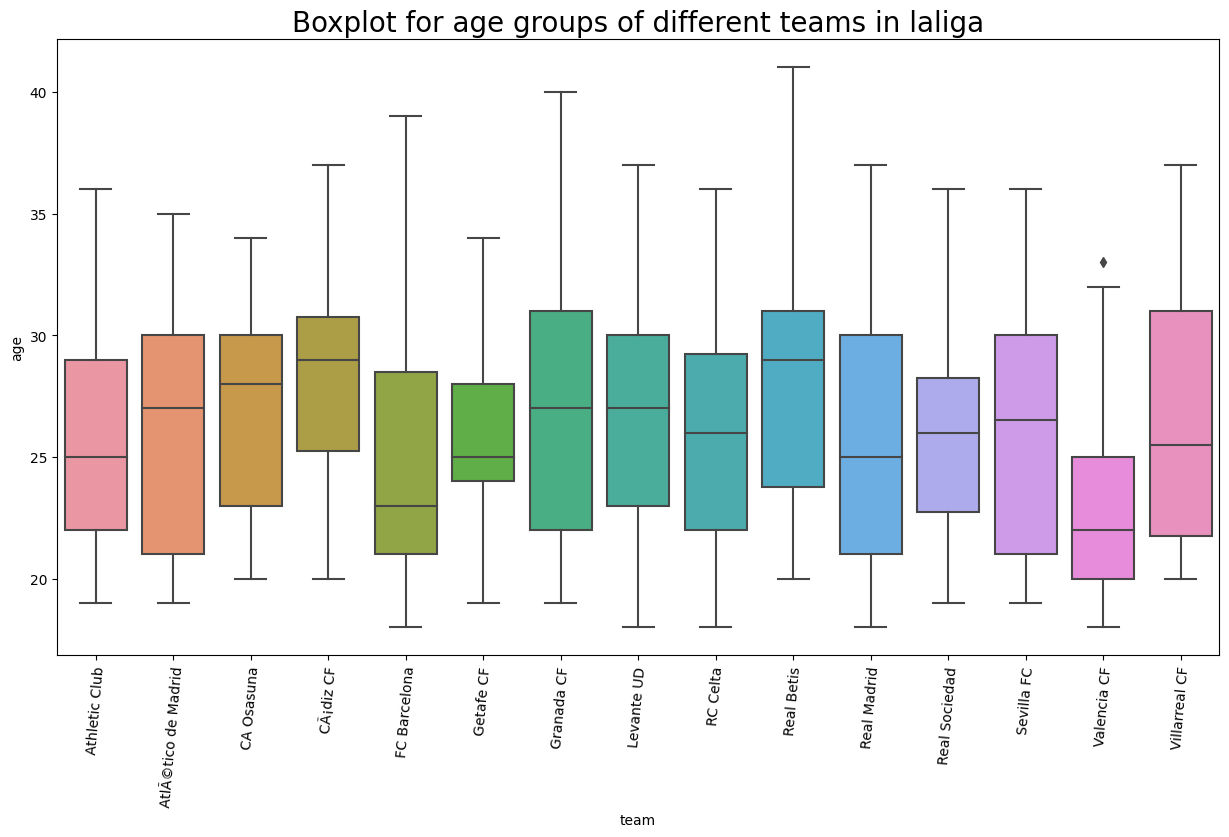

In [137]:
plt.figure(figsize =(15,8))
sns.boxplot(x='team',y='age',data = laliga)
plt.xticks(rotation=85)
plt.title('Boxplot for age groups of different teams in laliga',fontsize=20)

In [65]:
club_goals = laliga.groupby('team')['goals'].sum()
club_goals.sort_values(ascending = False)

team
Real Madrid            80
FC Barcelona           65
AtlÃ©tico de Madrid    63
Villarreal CF          61
Real Betis             60
Levante UD             51
Sevilla FC             48
Granada CF             43
RC Celta               43
Valencia CF            43
Athletic Club          40
Real Sociedad          40
CA Osasuna             37
CÃ¡diz CF              35
Getafe CF              30
Name: goals, dtype: int64

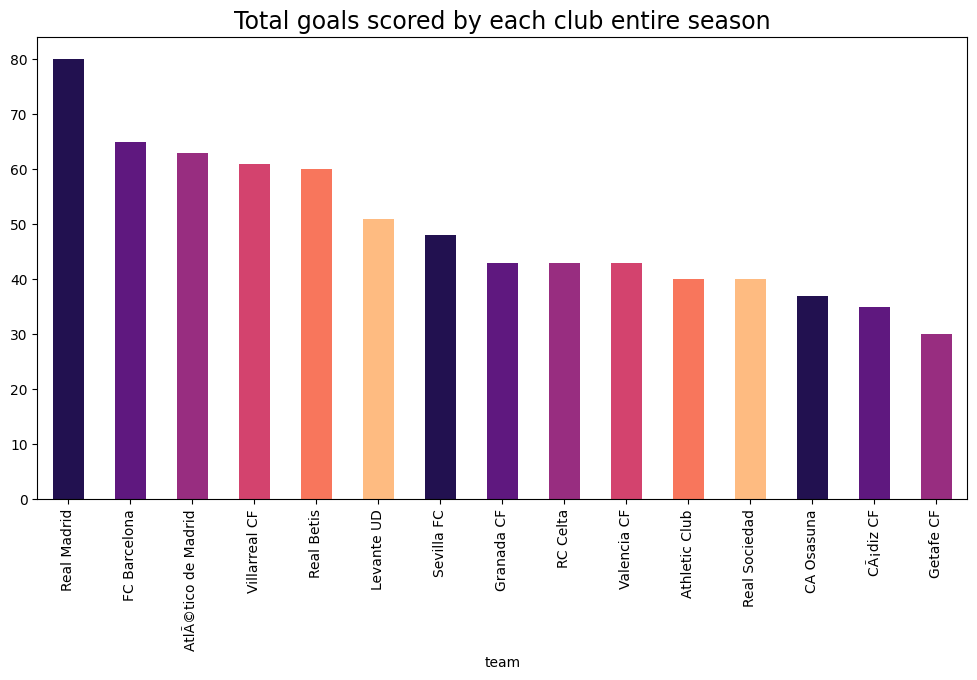

In [76]:
club_goals.sort_values(ascending=False).plot(kind='bar',color = sns.color_palette('magma'),figsize=(12,6))
plt.title('Total goals scored by each club entire season',fontsize=17)
plt.show()

In [91]:
club_assists = laliga.groupby('team')['goal_assists'].sum()
club_assists.sort_values(ascending=False)

team
Real Madrid            59
FC Barcelona           52
Villarreal CF          50
AtlÃ©tico de Madrid    44
Real Betis             44
Sevilla FC             40
Athletic Club          34
Levante UD             33
RC Celta               30
Valencia CF            29
Granada CF             28
Getafe CF              24
CA Osasuna             23
Real Sociedad          22
CÃ¡diz CF              21
Name: goal_assists, dtype: int64

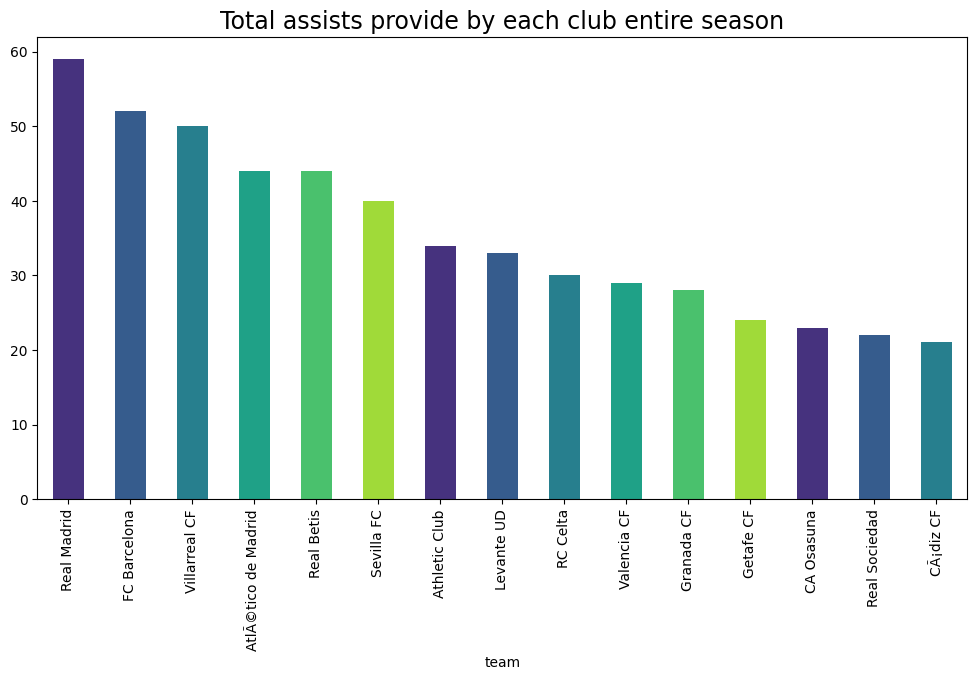

In [94]:
club_assists.sort_values(ascending=False).plot(kind='bar',color = sns.color_palette('viridis'),figsize=(12,6))
plt.title('Total assists provide by each club entire season',fontsize=17)
plt.show()

In [86]:
most_goal_individual = laliga[['nickname','team','goals','games_played']].nlargest(n=10,columns='goals')
most_goal_individual

,nickname,team,goals,games_played
339,Benzema,Real Madrid,27,32
275,Iago Aspas,RC Celta,18,37
357,Vini Jr.,Real Madrid,17,35
168,Enes Ãœnal,Getafe CF,16,37
307,Juanmi,Real Betis,16,33
239,A. J. Morales,Levante UD,13,35
60,Correa,AtlÃ©tico de Madrid,12,36
145,Memphis,FC Barcelona,12,28
46,SuÃ¡rez,AtlÃ©tico de Madrid,11,35
151,Aubameyang,FC Barcelona,11,17


In [89]:
most_assists_individual = laliga[['nickname','team','goals','goal_assists','games_played']].nlargest(n=10,columns='goal_assists')
most_assists_individual

,nickname,team,goals,goal_assists,games_played
149,O. DembÃ©lÃ©,FC Barcelona,1,13,21
339,Benzema,Real Madrid,27,12,32
8,Muniain,Athletic Club,4,10,35
139,Jordi Alba,FC Barcelona,2,10,30
357,Vini Jr.,Real Madrid,17,10,35
467,Parejo,Villarreal CF,2,10,33
311,Fekir,Real Betis,6,8,34
343,ModriÄ‡,Real Madrid,2,8,28
236,De Frutos,Levante UD,4,7,25
239,A. J. Morales,Levante UD,13,7,35


In [164]:
penalties_taken = laliga['penalties_taken'].sum()
penalties_taken

107

In [166]:
penalty_goals = laliga['penalty_goals'].sum()
penalty_goals

76

In [167]:
penalties_missed = laliga['penalties_taken'].sum() - laliga['penalty_goals'].sum()
penalties_missed

31

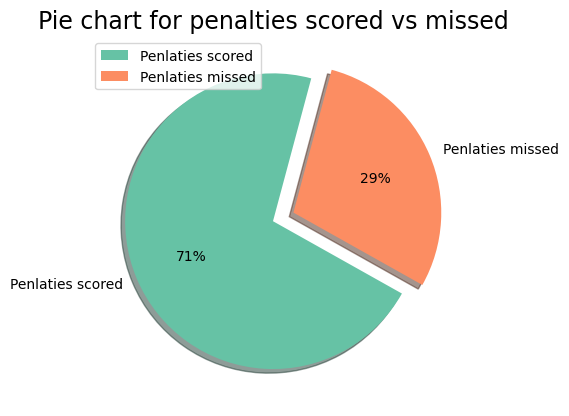

In [168]:
data = [penalty_goals,penalties_missed] 
labels = ["Penlaties scored","Penlaties missed"]
color = sns.color_palette("Set2")
explode = [0,0.15]
plt.pie(data,labels = labels,explode = explode,shadow = True , startangle = 75,colors = color,autopct = "%.0f%%")
plt.legend()
plt.title('Pie chart for penalties scored vs missed',fontsize=17)
plt.show()

In [102]:
penalties_attempted = laliga.groupby('team')['penalties_taken'].sum()
penalties_attempted.sort_values(ascending=False)

team
Levante UD             13
Real Madrid            12
Real Sociedad          10
Valencia CF             9
CA Osasuna              8
Athletic Club           7
CÃ¡diz CF               6
FC Barcelona            6
RC Celta                6
Real Betis              6
Villarreal CF           6
AtlÃ©tico de Madrid     5
Getafe CF               5
Granada CF              5
Sevilla FC              3
Name: penalties_taken, dtype: int64

In [97]:
penalties_scored = laliga.groupby('team')['penalty_goals'].sum()
penalties_scored.sort_values(ascending=False)

team
Real Sociedad          9
Levante UD             8
Real Madrid            8
Valencia CF            8
CA Osasuna             6
Real Betis             6
FC Barcelona           5
Villarreal CF          5
AtlÃ©tico de Madrid    4
Athletic Club          3
CÃ¡diz CF              3
Getafe CF              3
Granada CF             3
RC Celta               3
Sevilla FC             2
Name: penalty_goals, dtype: int64

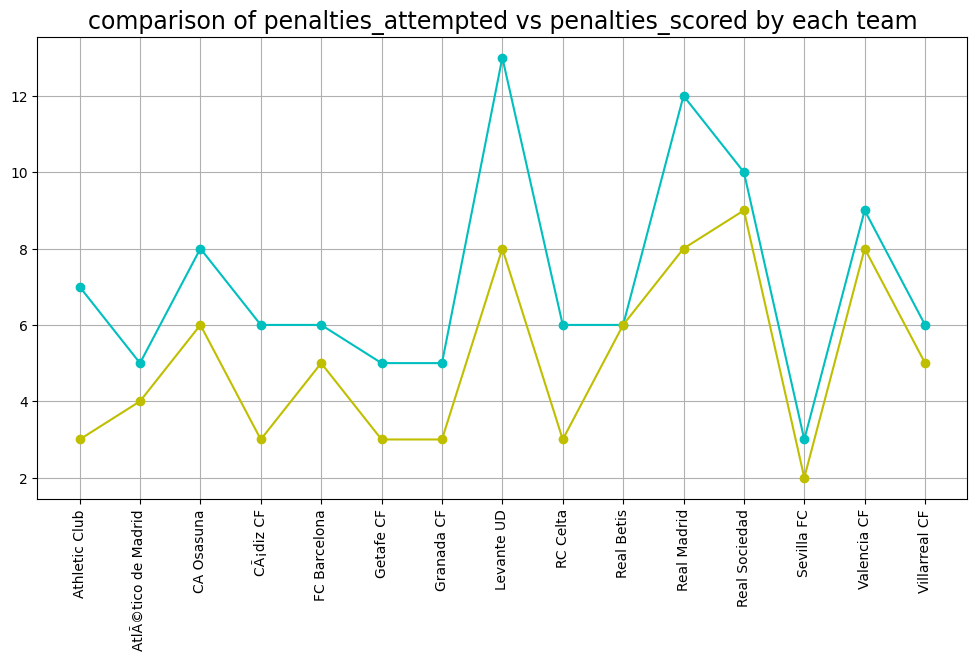

In [134]:
plt.figure(figsize=(12,6))
plt.plot(penalties_attempted,'co-',penalties_scored,'yo-')
plt.title('comparison of penalties_attempted vs penalties_scored by each team',fontsize=17)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [135]:
penalty_conversion_rate = ((penalties_scored/penalties_attempted)*100).sort_values(ascending=False)
penalty_conversion_rate

team
Real Betis             100.000000
Real Sociedad           90.000000
Valencia CF             88.888889
FC Barcelona            83.333333
Villarreal CF           83.333333
AtlÃ©tico de Madrid     80.000000
CA Osasuna              75.000000
Real Madrid             66.666667
Sevilla FC              66.666667
Levante UD              61.538462
Getafe CF               60.000000
Granada CF              60.000000
CÃ¡diz CF               50.000000
RC Celta                50.000000
Athletic Club           42.857143
dtype: float64

In [148]:
most_penalty_saves_by_goalkepper = laliga[["nickname","team","penalties_faced","penalties_saved"]].nlargest(n=10, columns="penalties_saved")
most_penalty_saves_by_goalkepper

,nickname,team,penalties_faced,penalties_saved
282,Dituro,RC Celta,8,4
86,S. Herrera,CA Osasuna,7,3
102,Ledesma,CÃ¡diz CF,13,2
204,Maximiano,Granada CF,7,2
40,Oblak,AtlÃ©tico de Madrid,8,1
143,Ter Stegen,FC Barcelona,3,1
164,David Soria,Getafe CF,4,1
222,Aitor Fdez.,Levante UD,2,1
323,Lunin,Real Madrid,2,1
354,Courtois,Real Madrid,3,1


In [184]:
ind_pen_save = laliga.groupby('position')
ind_pen_save

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [175]:
ind_pen_face = laliga[['nickname','penalties_faced']].sort_values(by="penalties_saved",ascending=False).head(10)
ind_pen_face

KeyError: 'penalties_saved'

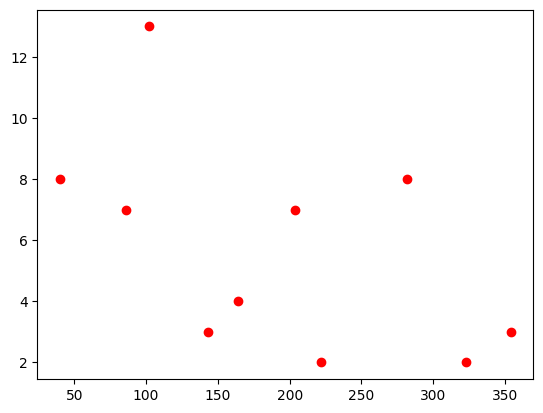

In [163]:
plt.plot(most_penalty_saves_by_goalkepper['penalties_faced'],'ro')
plt.show()